# Bank Marketing Dataset

# CGAN Training for synthesize datasets


CGAN: A conditional generative adversarial network (CGAN) is a type of GAN that also takes advantage of labels during the training process. Generator — Given a label and random array as input, this network generates data with the same structure as the training data observations corresponding to the same label.

Then, we save the CGAN models for the data generation pipeline.

In [138]:
# TODO
# try also https://github.com/sdv-dev/CTGAN

## Imports

In [6]:
import pandas as pd
import numpy as np
from ydata_synthetic.synthesizers.regular import CGAN
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
import matplotlib.pyplot as plt
from src.pipeline.preprocessing.label_preprocessor import LabelProcessor
from src.pipeline.preprocessing.paths import BANK_MARKETING_LABEL_ENCODER_PATH
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# from src.pipeline.data_generation.data_generator import GANDataGenerator
from src.pipeline.datasets.training_datasets import BankMarketingDataset, BankMarketingProcessedDataset
from src.pipeline.model.paths import BANK_MARKETING_GEN_CGAN_MODEL_PATH


In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reading the Datasets

# Load Preprocessed Data

# EDA and Preprocessing

In [12]:
# init GANDataGenerator
print('Bank Marketing dataset\n')

dataset = BankMarketingDataset()
processor = LabelProcessor(dataset, BANK_MARKETING_LABEL_ENCODER_PATH)
df = processor.preprocessed_data(dataset.raw_df)
label_col = dataset.label_column_name

df.head()
df.shape

print(f'Label columns name is: {label_col}. With {df[label_col].nunique()} unique values.'
      f'({df[label_col].unique()})')


Bank Marketing dataset

loading dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


(4521, 17)

Label columns name is: y. With 2 unique values.([0 1])


In [14]:
train_sample = df


# Init the GAN

In [15]:

to_save = False

#Define the Conditional GAN and training parameters

noise_dim = 32
dim = 128
batch_size = 128
beta_1 = 0.5
beta_2 = 0.9

log_step = 100
epochs = 500 + 1
learning_rate = 5e-4


gan_args = ModelParameters(batch_size=batch_size,
                           lr=learning_rate,
                           betas=(beta_1, beta_2),
                           noise_dim=noise_dim,
                           n_cols=train_sample.shape[1] - 1,  # Don't count the label columns here
                           layers_dim=dim)

train_args = TrainParameters(epochs=epochs,
                             cache_prefix='',
                             sample_interval=log_step,
                             label_dim=-1,
                             labels=[0,1])

num_classes = df[label_col].nunique()

#Init the Conditional GAN providing the index of the label column as one of the arguments
synthesizer = CGAN(model_parameters=gan_args, num_classes=num_classes)




# Training


In [16]:
#----------------------------
#    GAN Training
#----------------------------

#Training the Conditional GAN
synthesizer.train(data=train_sample, label_col=label_col, train_arguments=train_args,
                 num_cols=dataset.numeric_feature_names, cat_cols=dataset.categorical_feature_names )



Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-12-25 21:17:24.065847: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-25 21:17:24.066608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-25 21:17:24.067043: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 5000 with Max-Q Design computeCapability: 7.5
coreClock: 1.35GHz coreCount: 48 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 357.69GiB/s
2021-12-25 21:17:24.067069: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic l

0 [D loss: 0.444076, acc.: 86.33%] [G loss: 1.223006]



  0%|          | 2/501 [00:06<24:07,  2.90s/it]

1 [D loss: 0.154165, acc.: 94.53%] [G loss: 3.442852]


  1%|          | 3/501 [00:08<20:49,  2.51s/it]

2 [D loss: 0.111553, acc.: 95.70%] [G loss: 6.047328]


  1%|          | 4/501 [00:10<19:53,  2.40s/it]

3 [D loss: 0.106982, acc.: 96.48%] [G loss: 7.813810]


  1%|          | 5/501 [00:12<18:52,  2.28s/it]

4 [D loss: 0.099022, acc.: 97.27%] [G loss: 10.151600]


  1%|          | 6/501 [00:14<18:27,  2.24s/it]

5 [D loss: 0.045346, acc.: 98.44%] [G loss: 14.239191]


  1%|▏         | 7/501 [00:16<18:26,  2.24s/it]

6 [D loss: 0.056339, acc.: 98.83%] [G loss: 18.324823]


  2%|▏         | 8/501 [00:18<18:05,  2.20s/it]

7 [D loss: 0.053758, acc.: 98.44%] [G loss: 18.667248]


  2%|▏         | 9/501 [00:21<17:55,  2.19s/it]

8 [D loss: 0.005539, acc.: 100.00%] [G loss: 23.574070]


  2%|▏         | 10/501 [00:23<17:31,  2.14s/it]

9 [D loss: 0.016095, acc.: 99.22%] [G loss: 24.969030]


  2%|▏         | 11/501 [00:25<17:34,  2.15s/it]

10 [D loss: 0.093124, acc.: 98.44%] [G loss: 27.775497]


  2%|▏         | 12/501 [00:27<17:36,  2.16s/it]

11 [D loss: 0.036497, acc.: 99.22%] [G loss: 29.364508]


  3%|▎         | 13/501 [00:29<17:23,  2.14s/it]

12 [D loss: 0.032684, acc.: 99.22%] [G loss: 28.975952]


  3%|▎         | 14/501 [00:31<17:17,  2.13s/it]

13 [D loss: 0.004643, acc.: 100.00%] [G loss: 33.902897]


  3%|▎         | 15/501 [00:33<17:17,  2.14s/it]

14 [D loss: 0.024189, acc.: 99.61%] [G loss: 34.653084]


  3%|▎         | 16/501 [00:35<17:05,  2.11s/it]

15 [D loss: 0.001713, acc.: 100.00%] [G loss: 36.782196]


  3%|▎         | 17/501 [00:38<17:14,  2.14s/it]

16 [D loss: 0.032272, acc.: 99.61%] [G loss: 35.639652]


  4%|▎         | 18/501 [00:40<17:18,  2.15s/it]

17 [D loss: 0.005271, acc.: 100.00%] [G loss: 38.017658]


  4%|▍         | 19/501 [00:42<17:22,  2.16s/it]

18 [D loss: 0.002710, acc.: 100.00%] [G loss: 43.623032]


  4%|▍         | 20/501 [00:44<17:34,  2.19s/it]

19 [D loss: 0.001660, acc.: 100.00%] [G loss: 44.133469]


  4%|▍         | 21/501 [00:46<17:41,  2.21s/it]

20 [D loss: 0.001695, acc.: 100.00%] [G loss: 44.793209]


  4%|▍         | 22/501 [00:49<17:33,  2.20s/it]

21 [D loss: 0.031266, acc.: 99.61%] [G loss: 51.049309]


  5%|▍         | 23/501 [00:51<17:44,  2.23s/it]

22 [D loss: 0.001431, acc.: 100.00%] [G loss: 46.514660]


  5%|▍         | 24/501 [00:53<18:03,  2.27s/it]

23 [D loss: 0.000573, acc.: 100.00%] [G loss: 54.004066]


  5%|▍         | 25/501 [00:55<17:39,  2.23s/it]

24 [D loss: 0.000443, acc.: 100.00%] [G loss: 45.920059]


  5%|▌         | 26/501 [00:58<17:41,  2.23s/it]

25 [D loss: 0.001639, acc.: 100.00%] [G loss: 50.215557]


  5%|▌         | 27/501 [01:00<17:30,  2.22s/it]

26 [D loss: 0.000835, acc.: 100.00%] [G loss: 68.399353]


  6%|▌         | 28/501 [01:02<17:18,  2.20s/it]

27 [D loss: 0.005662, acc.: 100.00%] [G loss: 63.774014]


  6%|▌         | 29/501 [01:04<17:20,  2.21s/it]

28 [D loss: 0.076271, acc.: 98.83%] [G loss: 64.809280]


  6%|▌         | 30/501 [01:06<17:21,  2.21s/it]

29 [D loss: 0.017915, acc.: 99.61%] [G loss: 64.162071]


  6%|▌         | 31/501 [01:09<17:08,  2.19s/it]

30 [D loss: 0.001444, acc.: 100.00%] [G loss: 70.723732]


  6%|▋         | 32/501 [01:11<17:19,  2.22s/it]

31 [D loss: 0.001564, acc.: 100.00%] [G loss: 67.625206]


  7%|▋         | 33/501 [01:13<17:12,  2.21s/it]

32 [D loss: 0.000418, acc.: 100.00%] [G loss: 68.338455]


  7%|▋         | 34/501 [01:16<17:43,  2.28s/it]

33 [D loss: 0.000279, acc.: 100.00%] [G loss: 75.539169]


  7%|▋         | 35/501 [01:18<17:23,  2.24s/it]

34 [D loss: 0.019958, acc.: 99.61%] [G loss: 74.740738]


  7%|▋         | 36/501 [01:20<17:40,  2.28s/it]

35 [D loss: 0.000304, acc.: 100.00%] [G loss: 78.590294]


  7%|▋         | 37/501 [01:22<17:15,  2.23s/it]

36 [D loss: 0.000310, acc.: 100.00%] [G loss: 70.008026]


  8%|▊         | 38/501 [01:24<17:02,  2.21s/it]

37 [D loss: 0.000713, acc.: 100.00%] [G loss: 93.105942]


  8%|▊         | 39/501 [01:27<17:03,  2.22s/it]

38 [D loss: 0.017148, acc.: 99.61%] [G loss: 94.568077]


  8%|▊         | 40/501 [01:29<17:11,  2.24s/it]

39 [D loss: 0.000399, acc.: 100.00%] [G loss: 90.008034]


  8%|▊         | 41/501 [01:31<17:14,  2.25s/it]

40 [D loss: 0.034902, acc.: 99.61%] [G loss: 112.100494]


  8%|▊         | 42/501 [01:33<17:01,  2.22s/it]

41 [D loss: 0.031660, acc.: 99.61%] [G loss: 88.014191]


  9%|▊         | 43/501 [01:35<16:40,  2.18s/it]

42 [D loss: 0.002122, acc.: 100.00%] [G loss: 98.413658]


  9%|▉         | 44/501 [01:38<16:45,  2.20s/it]

43 [D loss: 0.001490, acc.: 100.00%] [G loss: 83.319382]


  9%|▉         | 45/501 [01:40<16:54,  2.23s/it]

44 [D loss: 0.021429, acc.: 99.61%] [G loss: 104.030327]


  9%|▉         | 46/501 [01:42<16:35,  2.19s/it]

45 [D loss: 0.000063, acc.: 100.00%] [G loss: 98.412933]


  9%|▉         | 47/501 [01:44<16:35,  2.19s/it]

46 [D loss: 0.000367, acc.: 100.00%] [G loss: 101.864418]


 10%|▉         | 48/501 [01:46<16:46,  2.22s/it]

47 [D loss: 0.026627, acc.: 99.22%] [G loss: 103.730667]


 10%|▉         | 49/501 [01:49<16:26,  2.18s/it]

48 [D loss: 0.000759, acc.: 100.00%] [G loss: 105.504745]


 10%|▉         | 50/501 [01:51<16:29,  2.19s/it]

49 [D loss: 0.000210, acc.: 100.00%] [G loss: 113.037987]


 10%|█         | 51/501 [01:53<16:21,  2.18s/it]

50 [D loss: 0.000629, acc.: 100.00%] [G loss: 117.894669]


 10%|█         | 52/501 [01:55<16:32,  2.21s/it]

51 [D loss: 0.006707, acc.: 100.00%] [G loss: 117.390434]


 11%|█         | 53/501 [01:57<16:32,  2.22s/it]

52 [D loss: 0.000040, acc.: 100.00%] [G loss: 115.144135]


 11%|█         | 54/501 [02:00<16:15,  2.18s/it]

53 [D loss: 0.000207, acc.: 100.00%] [G loss: 121.852829]


 11%|█         | 55/501 [02:02<16:11,  2.18s/it]

54 [D loss: 0.000065, acc.: 100.00%] [G loss: 126.083191]


 11%|█         | 56/501 [02:04<16:12,  2.19s/it]

55 [D loss: 0.004382, acc.: 100.00%] [G loss: 125.701881]


 11%|█▏        | 57/501 [02:06<16:08,  2.18s/it]

56 [D loss: 0.000031, acc.: 100.00%] [G loss: 129.115463]


 12%|█▏        | 58/501 [02:08<16:12,  2.19s/it]

57 [D loss: 0.000503, acc.: 100.00%] [G loss: 133.981873]


 12%|█▏        | 59/501 [02:11<16:13,  2.20s/it]

58 [D loss: 0.000785, acc.: 100.00%] [G loss: 158.581055]


 12%|█▏        | 60/501 [02:13<16:11,  2.20s/it]

59 [D loss: 0.000791, acc.: 100.00%] [G loss: 144.418365]


 12%|█▏        | 61/501 [02:15<16:27,  2.24s/it]

60 [D loss: 0.000112, acc.: 100.00%] [G loss: 120.740761]


 12%|█▏        | 62/501 [02:17<16:35,  2.27s/it]

61 [D loss: 0.008068, acc.: 99.61%] [G loss: 145.073807]


 13%|█▎        | 63/501 [02:20<16:37,  2.28s/it]

62 [D loss: 0.000145, acc.: 100.00%] [G loss: 150.713593]


 13%|█▎        | 64/501 [02:22<16:27,  2.26s/it]

63 [D loss: 0.022885, acc.: 99.61%] [G loss: 133.630508]


 13%|█▎        | 65/501 [02:24<16:12,  2.23s/it]

64 [D loss: 0.000154, acc.: 100.00%] [G loss: 135.441162]


 13%|█▎        | 66/501 [02:26<16:05,  2.22s/it]

65 [D loss: 0.000291, acc.: 100.00%] [G loss: 146.700256]


 13%|█▎        | 67/501 [02:29<16:16,  2.25s/it]

66 [D loss: 0.000817, acc.: 100.00%] [G loss: 157.079926]


 14%|█▎        | 68/501 [02:31<15:59,  2.22s/it]

67 [D loss: 0.000370, acc.: 100.00%] [G loss: 149.202667]


 14%|█▍        | 69/501 [02:33<15:58,  2.22s/it]

68 [D loss: 0.000200, acc.: 100.00%] [G loss: 160.769455]


 14%|█▍        | 70/501 [02:35<16:01,  2.23s/it]

69 [D loss: 0.026118, acc.: 99.61%] [G loss: 175.632324]


 14%|█▍        | 71/501 [02:38<16:13,  2.26s/it]

70 [D loss: 0.000091, acc.: 100.00%] [G loss: 144.544403]


 14%|█▍        | 72/501 [02:40<16:02,  2.24s/it]

71 [D loss: 0.000190, acc.: 100.00%] [G loss: 168.649979]


 15%|█▍        | 73/501 [02:42<16:03,  2.25s/it]

72 [D loss: 0.000181, acc.: 100.00%] [G loss: 154.801224]


 15%|█▍        | 74/501 [02:44<15:54,  2.24s/it]

73 [D loss: 0.000071, acc.: 100.00%] [G loss: 148.357727]


 15%|█▍        | 75/501 [02:46<15:45,  2.22s/it]

74 [D loss: 0.000223, acc.: 100.00%] [G loss: 167.365875]


 15%|█▌        | 76/501 [02:49<15:35,  2.20s/it]

75 [D loss: 0.000404, acc.: 100.00%] [G loss: 141.282120]


 15%|█▌        | 77/501 [02:51<15:35,  2.21s/it]

76 [D loss: 0.000161, acc.: 100.00%] [G loss: 179.175888]


 16%|█▌        | 78/501 [02:53<15:29,  2.20s/it]

77 [D loss: 0.000073, acc.: 100.00%] [G loss: 153.161316]


 16%|█▌        | 79/501 [02:55<15:35,  2.22s/it]

78 [D loss: 0.000339, acc.: 100.00%] [G loss: 160.687454]


 16%|█▌        | 80/501 [02:57<15:37,  2.23s/it]

79 [D loss: 0.000216, acc.: 100.00%] [G loss: 192.755707]


 16%|█▌        | 81/501 [03:00<15:36,  2.23s/it]

80 [D loss: 0.023301, acc.: 99.61%] [G loss: 156.606262]


 16%|█▋        | 82/501 [03:02<15:34,  2.23s/it]

81 [D loss: 0.000522, acc.: 100.00%] [G loss: 147.822952]


 17%|█▋        | 83/501 [03:04<15:35,  2.24s/it]

82 [D loss: 0.030656, acc.: 99.61%] [G loss: 162.553116]


 17%|█▋        | 84/501 [03:06<15:31,  2.23s/it]

83 [D loss: 0.007330, acc.: 100.00%] [G loss: 192.534378]


 17%|█▋        | 85/501 [03:09<15:21,  2.22s/it]

84 [D loss: 0.000330, acc.: 100.00%] [G loss: 180.062775]


 17%|█▋        | 86/501 [03:11<15:21,  2.22s/it]

85 [D loss: 0.000325, acc.: 100.00%] [G loss: 181.477142]


 17%|█▋        | 87/501 [03:13<15:25,  2.23s/it]

86 [D loss: 0.000069, acc.: 100.00%] [G loss: 159.213165]


 18%|█▊        | 88/501 [03:15<15:22,  2.23s/it]

87 [D loss: 0.000108, acc.: 100.00%] [G loss: 172.388550]


 18%|█▊        | 89/501 [03:18<15:12,  2.22s/it]

88 [D loss: 0.000819, acc.: 100.00%] [G loss: 171.304688]


 18%|█▊        | 90/501 [03:20<15:05,  2.20s/it]

89 [D loss: 0.000404, acc.: 100.00%] [G loss: 193.001099]


 18%|█▊        | 91/501 [03:22<15:04,  2.21s/it]

90 [D loss: 0.000939, acc.: 100.00%] [G loss: 149.213058]


 18%|█▊        | 92/501 [03:24<15:04,  2.21s/it]

91 [D loss: 0.000269, acc.: 100.00%] [G loss: 193.102509]


 19%|█▊        | 93/501 [03:26<15:08,  2.23s/it]

92 [D loss: 0.000020, acc.: 100.00%] [G loss: 186.393021]


 19%|█▉        | 94/501 [03:29<14:59,  2.21s/it]

93 [D loss: 0.000242, acc.: 100.00%] [G loss: 179.931900]


 19%|█▉        | 95/501 [03:31<14:55,  2.20s/it]

94 [D loss: 0.000054, acc.: 100.00%] [G loss: 186.590805]


 19%|█▉        | 96/501 [03:33<14:41,  2.18s/it]

95 [D loss: 0.002012, acc.: 100.00%] [G loss: 158.826675]


 19%|█▉        | 97/501 [03:35<14:26,  2.14s/it]

96 [D loss: 0.000018, acc.: 100.00%] [G loss: 199.624237]


 20%|█▉        | 98/501 [03:37<14:13,  2.12s/it]

97 [D loss: 0.000522, acc.: 100.00%] [G loss: 181.532394]


 20%|█▉        | 99/501 [03:39<14:02,  2.10s/it]

98 [D loss: 0.000023, acc.: 100.00%] [G loss: 179.499741]


 20%|█▉        | 100/501 [03:41<13:58,  2.09s/it]

99 [D loss: 0.000621, acc.: 100.00%] [G loss: 199.950562]
100 [D loss: 0.000062, acc.: 100.00%] [G loss: 158.708099]



 20%|██        | 102/501 [03:46<14:55,  2.24s/it]

101 [D loss: 0.000290, acc.: 100.00%] [G loss: 195.285339]


 21%|██        | 103/501 [03:48<14:45,  2.22s/it]

102 [D loss: 0.000046, acc.: 100.00%] [G loss: 191.255310]


 21%|██        | 104/501 [03:50<14:39,  2.21s/it]

103 [D loss: 0.000214, acc.: 100.00%] [G loss: 205.467239]


 21%|██        | 105/501 [03:53<14:32,  2.20s/it]

104 [D loss: 0.000292, acc.: 100.00%] [G loss: 172.984848]


 21%|██        | 106/501 [03:55<14:27,  2.20s/it]

105 [D loss: 0.000527, acc.: 100.00%] [G loss: 208.788239]


 21%|██▏       | 107/501 [03:57<14:10,  2.16s/it]

106 [D loss: 0.000147, acc.: 100.00%] [G loss: 209.017349]


 22%|██▏       | 108/501 [03:59<13:58,  2.13s/it]

107 [D loss: 0.000022, acc.: 100.00%] [G loss: 186.222839]


 22%|██▏       | 109/501 [04:01<14:00,  2.14s/it]

108 [D loss: 0.000037, acc.: 100.00%] [G loss: 187.340256]


 22%|██▏       | 110/501 [04:03<14:11,  2.18s/it]

109 [D loss: 0.000051, acc.: 100.00%] [G loss: 178.913055]


 22%|██▏       | 111/501 [04:06<14:15,  2.19s/it]

110 [D loss: 0.000128, acc.: 100.00%] [G loss: 200.788223]


 22%|██▏       | 112/501 [04:08<13:57,  2.15s/it]

111 [D loss: 0.000080, acc.: 100.00%] [G loss: 190.364410]


 23%|██▎       | 113/501 [04:10<13:50,  2.14s/it]

112 [D loss: 0.000162, acc.: 100.00%] [G loss: 197.440216]


 23%|██▎       | 114/501 [04:12<14:01,  2.18s/it]

113 [D loss: 0.000681, acc.: 100.00%] [G loss: 202.394165]


 23%|██▎       | 115/501 [04:14<14:04,  2.19s/it]

114 [D loss: 0.000450, acc.: 100.00%] [G loss: 215.210358]


 23%|██▎       | 116/501 [04:16<14:12,  2.22s/it]

115 [D loss: 0.000780, acc.: 100.00%] [G loss: 163.755402]


 23%|██▎       | 117/501 [04:19<14:03,  2.20s/it]

116 [D loss: 0.000206, acc.: 100.00%] [G loss: 190.626160]


 24%|██▎       | 118/501 [04:21<13:57,  2.19s/it]

117 [D loss: 0.022914, acc.: 99.61%] [G loss: 179.212860]


 24%|██▍       | 119/501 [04:23<13:53,  2.18s/it]

118 [D loss: 0.000141, acc.: 100.00%] [G loss: 208.721283]


 24%|██▍       | 120/501 [04:25<13:58,  2.20s/it]

119 [D loss: 0.000985, acc.: 100.00%] [G loss: 183.180893]


 24%|██▍       | 121/501 [04:27<13:54,  2.20s/it]

120 [D loss: 0.001908, acc.: 100.00%] [G loss: 170.887634]


 24%|██▍       | 122/501 [04:30<13:52,  2.20s/it]

121 [D loss: 0.000258, acc.: 100.00%] [G loss: 185.082703]


 25%|██▍       | 123/501 [04:32<13:51,  2.20s/it]

122 [D loss: 0.000448, acc.: 100.00%] [G loss: 172.447052]


 25%|██▍       | 124/501 [04:34<13:53,  2.21s/it]

123 [D loss: 0.001713, acc.: 100.00%] [G loss: 210.629639]


 25%|██▍       | 125/501 [04:36<13:57,  2.23s/it]

124 [D loss: 0.000163, acc.: 100.00%] [G loss: 189.860504]


 25%|██▌       | 126/501 [04:39<14:01,  2.24s/it]

125 [D loss: 0.001069, acc.: 100.00%] [G loss: 226.573471]


 25%|██▌       | 127/501 [04:41<13:54,  2.23s/it]

126 [D loss: 0.000047, acc.: 100.00%] [G loss: 217.604431]


 26%|██▌       | 128/501 [04:43<14:07,  2.27s/it]

127 [D loss: 0.000047, acc.: 100.00%] [G loss: 186.818512]


 26%|██▌       | 129/501 [04:45<14:04,  2.27s/it]

128 [D loss: 0.000238, acc.: 100.00%] [G loss: 173.561646]


 26%|██▌       | 130/501 [04:48<14:14,  2.30s/it]

129 [D loss: 0.000095, acc.: 100.00%] [G loss: 164.979614]


 26%|██▌       | 131/501 [04:50<14:17,  2.32s/it]

130 [D loss: 0.004795, acc.: 99.61%] [G loss: 192.110977]


 26%|██▋       | 132/501 [04:52<13:47,  2.24s/it]

131 [D loss: 0.000088, acc.: 100.00%] [G loss: 217.050659]


 27%|██▋       | 133/501 [04:54<13:31,  2.21s/it]

132 [D loss: 0.000147, acc.: 100.00%] [G loss: 179.896606]


 27%|██▋       | 134/501 [04:56<13:21,  2.18s/it]

133 [D loss: 0.006629, acc.: 99.61%] [G loss: 215.164307]


 27%|██▋       | 135/501 [04:59<13:31,  2.22s/it]

134 [D loss: 0.000045, acc.: 100.00%] [G loss: 186.245346]


 27%|██▋       | 136/501 [05:01<13:38,  2.24s/it]

135 [D loss: 0.002775, acc.: 100.00%] [G loss: 186.765289]


 27%|██▋       | 137/501 [05:04<14:06,  2.33s/it]

136 [D loss: 0.000347, acc.: 100.00%] [G loss: 203.311661]


 28%|██▊       | 138/501 [05:06<13:49,  2.29s/it]

137 [D loss: 0.000342, acc.: 100.00%] [G loss: 196.890381]


 28%|██▊       | 139/501 [05:08<13:29,  2.24s/it]

138 [D loss: 0.021239, acc.: 99.61%] [G loss: 190.510406]


 28%|██▊       | 140/501 [05:10<13:15,  2.20s/it]

139 [D loss: 0.000341, acc.: 100.00%] [G loss: 191.401413]


 28%|██▊       | 141/501 [05:12<13:10,  2.19s/it]

140 [D loss: 0.000184, acc.: 100.00%] [G loss: 170.071228]


 28%|██▊       | 142/501 [05:14<13:10,  2.20s/it]

141 [D loss: 0.000027, acc.: 100.00%] [G loss: 203.865555]


 29%|██▊       | 143/501 [05:17<13:13,  2.22s/it]

142 [D loss: 0.000170, acc.: 100.00%] [G loss: 202.156784]


 29%|██▊       | 144/501 [05:19<13:20,  2.24s/it]

143 [D loss: 0.000286, acc.: 100.00%] [G loss: 180.895691]


 29%|██▉       | 145/501 [05:21<13:00,  2.19s/it]

144 [D loss: 0.001176, acc.: 100.00%] [G loss: 183.858887]


 29%|██▉       | 146/501 [05:23<12:53,  2.18s/it]

145 [D loss: 0.000804, acc.: 100.00%] [G loss: 209.239151]


 29%|██▉       | 147/501 [05:25<12:41,  2.15s/it]

146 [D loss: 0.002026, acc.: 100.00%] [G loss: 183.896545]


 30%|██▉       | 148/501 [05:27<12:35,  2.14s/it]

147 [D loss: 0.000325, acc.: 100.00%] [G loss: 176.595993]


 30%|██▉       | 149/501 [05:29<12:26,  2.12s/it]

148 [D loss: 0.072439, acc.: 99.22%] [G loss: 196.145874]


 30%|██▉       | 150/501 [05:32<12:23,  2.12s/it]

149 [D loss: 0.000081, acc.: 100.00%] [G loss: 187.842941]


 30%|███       | 151/501 [05:34<12:22,  2.12s/it]

150 [D loss: 0.000443, acc.: 100.00%] [G loss: 190.322784]


 30%|███       | 152/501 [05:36<12:21,  2.12s/it]

151 [D loss: 0.002639, acc.: 100.00%] [G loss: 171.156204]


 31%|███       | 153/501 [05:38<12:15,  2.11s/it]

152 [D loss: 0.001091, acc.: 100.00%] [G loss: 154.109741]


 31%|███       | 154/501 [05:40<12:06,  2.09s/it]

153 [D loss: 0.000263, acc.: 100.00%] [G loss: 169.924271]


 31%|███       | 155/501 [05:42<12:10,  2.11s/it]

154 [D loss: 0.000184, acc.: 100.00%] [G loss: 171.953796]


 31%|███       | 156/501 [05:44<11:59,  2.09s/it]

155 [D loss: 0.000404, acc.: 100.00%] [G loss: 160.618362]


 31%|███▏      | 157/501 [05:46<11:51,  2.07s/it]

156 [D loss: 0.000473, acc.: 100.00%] [G loss: 172.722076]


 32%|███▏      | 158/501 [05:48<11:48,  2.07s/it]

157 [D loss: 0.009985, acc.: 99.61%] [G loss: 190.259811]


 32%|███▏      | 159/501 [05:50<11:43,  2.06s/it]

158 [D loss: 0.000329, acc.: 100.00%] [G loss: 211.273651]


 32%|███▏      | 160/501 [05:52<11:47,  2.07s/it]

159 [D loss: 0.000992, acc.: 100.00%] [G loss: 155.077209]


 32%|███▏      | 161/501 [05:54<11:48,  2.08s/it]

160 [D loss: 0.000089, acc.: 100.00%] [G loss: 170.880096]


 32%|███▏      | 162/501 [05:57<11:46,  2.09s/it]

161 [D loss: 0.000125, acc.: 100.00%] [G loss: 165.797424]


 33%|███▎      | 163/501 [05:59<11:42,  2.08s/it]

162 [D loss: 0.000479, acc.: 100.00%] [G loss: 200.601028]


 33%|███▎      | 164/501 [06:01<11:34,  2.06s/it]

163 [D loss: 0.000596, acc.: 100.00%] [G loss: 153.207520]


 33%|███▎      | 165/501 [06:03<11:34,  2.07s/it]

164 [D loss: 0.000181, acc.: 100.00%] [G loss: 197.292587]


 33%|███▎      | 166/501 [06:05<11:29,  2.06s/it]

165 [D loss: 0.001057, acc.: 100.00%] [G loss: 170.324860]


 33%|███▎      | 167/501 [06:07<11:31,  2.07s/it]

166 [D loss: 0.000227, acc.: 100.00%] [G loss: 165.348190]


 34%|███▎      | 168/501 [06:09<11:28,  2.07s/it]

167 [D loss: 0.000830, acc.: 100.00%] [G loss: 176.349701]


 34%|███▎      | 169/501 [06:11<11:31,  2.08s/it]

168 [D loss: 0.000712, acc.: 100.00%] [G loss: 171.295990]


 34%|███▍      | 170/501 [06:13<11:30,  2.09s/it]

169 [D loss: 0.000172, acc.: 100.00%] [G loss: 160.760544]


 34%|███▍      | 171/501 [06:15<11:26,  2.08s/it]

170 [D loss: 0.005422, acc.: 99.61%] [G loss: 185.248764]


 34%|███▍      | 172/501 [06:17<11:23,  2.08s/it]

171 [D loss: 0.000153, acc.: 100.00%] [G loss: 177.575485]


 35%|███▍      | 173/501 [06:19<11:20,  2.08s/it]

172 [D loss: 0.000099, acc.: 100.00%] [G loss: 153.990387]


 35%|███▍      | 174/501 [06:21<11:12,  2.06s/it]

173 [D loss: 0.000397, acc.: 100.00%] [G loss: 157.710693]


 35%|███▍      | 175/501 [06:23<11:10,  2.06s/it]

174 [D loss: 0.000113, acc.: 100.00%] [G loss: 161.661194]


 35%|███▌      | 176/501 [06:25<11:08,  2.06s/it]

175 [D loss: 0.001650, acc.: 100.00%] [G loss: 176.621552]


 35%|███▌      | 177/501 [06:28<11:11,  2.07s/it]

176 [D loss: 0.025012, acc.: 99.61%] [G loss: 167.651093]


 36%|███▌      | 178/501 [06:30<11:11,  2.08s/it]

177 [D loss: 0.000395, acc.: 100.00%] [G loss: 205.359421]


 36%|███▌      | 179/501 [06:32<11:08,  2.08s/it]

178 [D loss: 0.000069, acc.: 100.00%] [G loss: 146.858002]


 36%|███▌      | 180/501 [06:34<11:09,  2.08s/it]

179 [D loss: 0.000150, acc.: 100.00%] [G loss: 174.991760]


 36%|███▌      | 181/501 [06:36<11:06,  2.08s/it]

180 [D loss: 0.000259, acc.: 100.00%] [G loss: 136.506287]


 36%|███▋      | 182/501 [06:38<11:06,  2.09s/it]

181 [D loss: 0.007512, acc.: 99.61%] [G loss: 155.742142]


 37%|███▋      | 183/501 [06:40<11:04,  2.09s/it]

182 [D loss: 0.000374, acc.: 100.00%] [G loss: 138.747101]


 37%|███▋      | 184/501 [06:42<11:07,  2.11s/it]

183 [D loss: 0.000422, acc.: 100.00%] [G loss: 161.493805]


 37%|███▋      | 185/501 [06:44<10:57,  2.08s/it]

184 [D loss: 0.000228, acc.: 100.00%] [G loss: 134.841232]


 37%|███▋      | 186/501 [06:46<10:50,  2.07s/it]

185 [D loss: 0.001345, acc.: 100.00%] [G loss: 140.111328]


 37%|███▋      | 187/501 [06:48<10:46,  2.06s/it]

186 [D loss: 0.052188, acc.: 99.22%] [G loss: 156.665833]


 38%|███▊      | 188/501 [06:50<10:41,  2.05s/it]

187 [D loss: 0.001185, acc.: 100.00%] [G loss: 140.466049]


 38%|███▊      | 189/501 [06:52<10:40,  2.05s/it]

188 [D loss: 0.000371, acc.: 100.00%] [G loss: 157.651459]


 38%|███▊      | 190/501 [06:55<10:38,  2.05s/it]

189 [D loss: 0.000303, acc.: 100.00%] [G loss: 137.307343]


 38%|███▊      | 191/501 [06:57<10:39,  2.06s/it]

190 [D loss: 0.000230, acc.: 100.00%] [G loss: 114.298218]


 38%|███▊      | 192/501 [06:59<10:40,  2.07s/it]

191 [D loss: 0.000469, acc.: 100.00%] [G loss: 146.331818]


 39%|███▊      | 193/501 [07:01<10:38,  2.07s/it]

192 [D loss: 0.000165, acc.: 100.00%] [G loss: 158.689651]


 39%|███▊      | 194/501 [07:03<10:39,  2.08s/it]

193 [D loss: 0.000212, acc.: 100.00%] [G loss: 134.443146]


 39%|███▉      | 195/501 [07:05<10:39,  2.09s/it]

194 [D loss: 0.000106, acc.: 100.00%] [G loss: 150.959213]


 39%|███▉      | 196/501 [07:07<10:39,  2.10s/it]

195 [D loss: 0.000787, acc.: 100.00%] [G loss: 150.107361]


 39%|███▉      | 197/501 [07:09<10:36,  2.09s/it]

196 [D loss: 0.000086, acc.: 100.00%] [G loss: 141.485809]


 40%|███▉      | 198/501 [07:11<10:33,  2.09s/it]

197 [D loss: 0.000114, acc.: 100.00%] [G loss: 128.942184]


 40%|███▉      | 199/501 [07:13<10:30,  2.09s/it]

198 [D loss: 0.000093, acc.: 100.00%] [G loss: 124.222305]


 40%|███▉      | 200/501 [07:15<10:29,  2.09s/it]

199 [D loss: 0.031833, acc.: 99.61%] [G loss: 156.373138]
200 [D loss: 0.000674, acc.: 100.00%] [G loss: 136.710800]



 40%|████      | 202/501 [07:20<10:55,  2.19s/it]

201 [D loss: 0.009598, acc.: 99.61%] [G loss: 141.107391]


 41%|████      | 203/501 [07:22<10:48,  2.18s/it]

202 [D loss: 0.000381, acc.: 100.00%] [G loss: 126.357765]


 41%|████      | 204/501 [07:24<10:46,  2.18s/it]

203 [D loss: 0.000437, acc.: 100.00%] [G loss: 109.704346]


 41%|████      | 205/501 [07:27<10:46,  2.18s/it]

204 [D loss: 0.000098, acc.: 100.00%] [G loss: 147.801346]


 41%|████      | 206/501 [07:29<10:39,  2.17s/it]

205 [D loss: 0.000085, acc.: 100.00%] [G loss: 118.619949]


 41%|████▏     | 207/501 [07:31<10:37,  2.17s/it]

206 [D loss: 0.011203, acc.: 100.00%] [G loss: 133.944901]


 42%|████▏     | 208/501 [07:33<10:35,  2.17s/it]

207 [D loss: 0.074070, acc.: 98.83%] [G loss: 100.807648]


 42%|████▏     | 209/501 [07:35<10:32,  2.17s/it]

208 [D loss: 0.000642, acc.: 100.00%] [G loss: 130.232239]


 42%|████▏     | 210/501 [07:37<10:22,  2.14s/it]

209 [D loss: 0.001118, acc.: 100.00%] [G loss: 140.393951]


 42%|████▏     | 211/501 [07:39<10:16,  2.13s/it]

210 [D loss: 0.001874, acc.: 100.00%] [G loss: 107.609703]


 42%|████▏     | 212/501 [07:42<10:11,  2.12s/it]

211 [D loss: 0.000310, acc.: 100.00%] [G loss: 121.481155]


 43%|████▎     | 213/501 [07:44<10:06,  2.11s/it]

212 [D loss: 0.001761, acc.: 100.00%] [G loss: 119.987762]


 43%|████▎     | 214/501 [07:46<10:10,  2.13s/it]

213 [D loss: 0.000484, acc.: 100.00%] [G loss: 133.173828]


 43%|████▎     | 215/501 [07:48<10:16,  2.16s/it]

214 [D loss: 0.027293, acc.: 99.61%] [G loss: 131.219971]


 43%|████▎     | 216/501 [07:50<10:14,  2.16s/it]

215 [D loss: 0.000221, acc.: 100.00%] [G loss: 97.664276]


 43%|████▎     | 217/501 [07:52<10:06,  2.14s/it]

216 [D loss: 0.001378, acc.: 100.00%] [G loss: 125.396324]


 44%|████▎     | 218/501 [07:54<09:55,  2.10s/it]

217 [D loss: 0.004033, acc.: 99.61%] [G loss: 137.756546]


 44%|████▎     | 219/501 [07:56<09:50,  2.09s/it]

218 [D loss: 0.000888, acc.: 100.00%] [G loss: 127.679932]


 44%|████▍     | 220/501 [07:58<09:49,  2.10s/it]

219 [D loss: 0.000826, acc.: 100.00%] [G loss: 111.967056]


 44%|████▍     | 221/501 [08:01<09:59,  2.14s/it]

220 [D loss: 0.000971, acc.: 100.00%] [G loss: 134.201736]


 44%|████▍     | 222/501 [08:03<10:00,  2.15s/it]

221 [D loss: 0.000381, acc.: 100.00%] [G loss: 111.278435]


 45%|████▍     | 223/501 [08:05<09:55,  2.14s/it]

222 [D loss: 0.000781, acc.: 100.00%] [G loss: 97.713310]


 45%|████▍     | 224/501 [08:07<09:49,  2.13s/it]

223 [D loss: 0.001444, acc.: 100.00%] [G loss: 102.052513]


 45%|████▍     | 225/501 [08:09<09:37,  2.09s/it]

224 [D loss: 0.031779, acc.: 99.61%] [G loss: 106.955559]


 45%|████▌     | 226/501 [08:11<09:32,  2.08s/it]

225 [D loss: 0.000122, acc.: 100.00%] [G loss: 86.295746]


 45%|████▌     | 227/501 [08:13<09:31,  2.09s/it]

226 [D loss: 0.000920, acc.: 100.00%] [G loss: 98.752487]


 46%|████▌     | 228/501 [08:15<09:39,  2.12s/it]

227 [D loss: 0.000679, acc.: 100.00%] [G loss: 99.407646]


 46%|████▌     | 229/501 [08:18<09:45,  2.15s/it]

228 [D loss: 0.023759, acc.: 99.61%] [G loss: 95.597626]


 46%|████▌     | 230/501 [08:20<10:03,  2.23s/it]

229 [D loss: 0.004087, acc.: 100.00%] [G loss: 102.601440]


 46%|████▌     | 231/501 [08:22<09:59,  2.22s/it]

230 [D loss: 0.046908, acc.: 98.83%] [G loss: 125.989487]


 46%|████▋     | 232/501 [08:24<09:50,  2.19s/it]

231 [D loss: 0.001939, acc.: 100.00%] [G loss: 92.204590]


 47%|████▋     | 233/501 [08:27<09:45,  2.18s/it]

232 [D loss: 0.001842, acc.: 100.00%] [G loss: 93.080307]


 47%|████▋     | 234/501 [08:29<09:46,  2.20s/it]

233 [D loss: 0.000532, acc.: 100.00%] [G loss: 108.234772]


 47%|████▋     | 235/501 [08:31<09:47,  2.21s/it]

234 [D loss: 0.033275, acc.: 99.22%] [G loss: 115.275871]


 47%|████▋     | 236/501 [08:33<09:40,  2.19s/it]

235 [D loss: 0.000574, acc.: 100.00%] [G loss: 96.213791]


 47%|████▋     | 237/501 [08:35<09:32,  2.17s/it]

236 [D loss: 0.000331, acc.: 100.00%] [G loss: 108.330803]


 48%|████▊     | 238/501 [08:37<09:19,  2.13s/it]

237 [D loss: 0.000502, acc.: 100.00%] [G loss: 110.687241]


 48%|████▊     | 239/501 [08:39<09:18,  2.13s/it]

238 [D loss: 0.000313, acc.: 100.00%] [G loss: 92.132080]


 48%|████▊     | 240/501 [08:42<09:18,  2.14s/it]

239 [D loss: 0.000209, acc.: 100.00%] [G loss: 99.033142]


 48%|████▊     | 241/501 [08:44<09:22,  2.16s/it]

240 [D loss: 0.013394, acc.: 99.61%] [G loss: 72.823769]


 48%|████▊     | 242/501 [08:46<09:26,  2.19s/it]

241 [D loss: 0.002647, acc.: 100.00%] [G loss: 99.734741]


 49%|████▊     | 243/501 [08:48<09:37,  2.24s/it]

242 [D loss: 0.000534, acc.: 100.00%] [G loss: 84.947205]


 49%|████▊     | 244/501 [08:51<09:27,  2.21s/it]

243 [D loss: 0.000180, acc.: 100.00%] [G loss: 112.965157]


 49%|████▉     | 245/501 [08:53<09:25,  2.21s/it]

244 [D loss: 0.000430, acc.: 100.00%] [G loss: 94.506592]


 49%|████▉     | 246/501 [08:55<09:37,  2.27s/it]

245 [D loss: 0.000271, acc.: 100.00%] [G loss: 86.952484]


 49%|████▉     | 247/501 [08:57<09:25,  2.22s/it]

246 [D loss: 0.000488, acc.: 100.00%] [G loss: 68.006042]


 50%|████▉     | 248/501 [09:00<09:21,  2.22s/it]

247 [D loss: 0.000765, acc.: 100.00%] [G loss: 99.677811]


 50%|████▉     | 249/501 [09:02<09:25,  2.24s/it]

248 [D loss: 0.001553, acc.: 100.00%] [G loss: 120.824814]


 50%|████▉     | 250/501 [09:04<09:14,  2.21s/it]

249 [D loss: 0.000161, acc.: 100.00%] [G loss: 94.386909]


 50%|█████     | 251/501 [09:06<09:34,  2.30s/it]

250 [D loss: 0.000367, acc.: 100.00%] [G loss: 94.297638]


 50%|█████     | 252/501 [09:09<09:20,  2.25s/it]

251 [D loss: 0.000846, acc.: 100.00%] [G loss: 100.090836]


 50%|█████     | 253/501 [09:11<09:30,  2.30s/it]

252 [D loss: 0.000696, acc.: 100.00%] [G loss: 109.840088]


 51%|█████     | 254/501 [09:13<09:17,  2.26s/it]

253 [D loss: 0.031779, acc.: 99.61%] [G loss: 77.081192]


 51%|█████     | 255/501 [09:15<09:18,  2.27s/it]

254 [D loss: 0.000577, acc.: 100.00%] [G loss: 84.947037]


 51%|█████     | 256/501 [09:18<09:20,  2.29s/it]

255 [D loss: 0.000461, acc.: 100.00%] [G loss: 74.850990]


 51%|█████▏    | 257/501 [09:20<09:10,  2.26s/it]

256 [D loss: 0.001556, acc.: 100.00%] [G loss: 82.303818]


 51%|█████▏    | 258/501 [09:22<09:07,  2.25s/it]

257 [D loss: 0.001538, acc.: 100.00%] [G loss: 67.301971]


 52%|█████▏    | 259/501 [09:24<09:03,  2.24s/it]

258 [D loss: 0.018012, acc.: 99.61%] [G loss: 75.293694]


 52%|█████▏    | 260/501 [09:27<08:55,  2.22s/it]

259 [D loss: 0.002499, acc.: 100.00%] [G loss: 84.982887]


 52%|█████▏    | 261/501 [09:29<08:54,  2.23s/it]

260 [D loss: 0.161795, acc.: 96.48%] [G loss: 61.399151]


 52%|█████▏    | 262/501 [09:31<08:49,  2.22s/it]

261 [D loss: 0.000277, acc.: 100.00%] [G loss: 79.895149]


 52%|█████▏    | 263/501 [09:33<08:46,  2.21s/it]

262 [D loss: 0.001016, acc.: 100.00%] [G loss: 67.143127]


 53%|█████▎    | 264/501 [09:35<08:42,  2.20s/it]

263 [D loss: 0.000251, acc.: 100.00%] [G loss: 89.050095]


 53%|█████▎    | 265/501 [09:38<08:36,  2.19s/it]

264 [D loss: 0.000730, acc.: 100.00%] [G loss: 71.041962]


 53%|█████▎    | 266/501 [09:40<08:36,  2.20s/it]

265 [D loss: 0.008915, acc.: 99.61%] [G loss: 70.993744]


 53%|█████▎    | 267/501 [09:42<08:34,  2.20s/it]

266 [D loss: 0.000727, acc.: 100.00%] [G loss: 78.938095]


 53%|█████▎    | 268/501 [09:44<08:31,  2.20s/it]

267 [D loss: 0.000232, acc.: 100.00%] [G loss: 72.924103]


 54%|█████▎    | 269/501 [09:47<08:37,  2.23s/it]

268 [D loss: 0.001674, acc.: 100.00%] [G loss: 84.445312]


 54%|█████▍    | 270/501 [09:49<08:44,  2.27s/it]

269 [D loss: 0.030829, acc.: 99.61%] [G loss: 79.020264]


 54%|█████▍    | 271/501 [09:51<08:35,  2.24s/it]

270 [D loss: 0.033431, acc.: 99.22%] [G loss: 60.447815]


 54%|█████▍    | 272/501 [09:54<08:50,  2.32s/it]

271 [D loss: 0.010239, acc.: 99.61%] [G loss: 94.585861]


 54%|█████▍    | 273/501 [09:56<08:38,  2.28s/it]

272 [D loss: 0.002604, acc.: 100.00%] [G loss: 78.018776]


 55%|█████▍    | 274/501 [09:58<08:26,  2.23s/it]

273 [D loss: 0.000257, acc.: 100.00%] [G loss: 92.082535]


 55%|█████▍    | 275/501 [10:00<08:30,  2.26s/it]

274 [D loss: 0.001652, acc.: 100.00%] [G loss: 66.400108]


 55%|█████▌    | 276/501 [10:02<08:23,  2.24s/it]

275 [D loss: 0.000358, acc.: 100.00%] [G loss: 75.928757]


 55%|█████▌    | 277/501 [10:05<08:32,  2.29s/it]

276 [D loss: 0.000514, acc.: 100.00%] [G loss: 82.101471]


 55%|█████▌    | 278/501 [10:07<08:43,  2.35s/it]

277 [D loss: 0.028929, acc.: 99.61%] [G loss: 63.719353]


 56%|█████▌    | 279/501 [10:10<08:48,  2.38s/it]

278 [D loss: 0.018318, acc.: 99.61%] [G loss: 57.750443]


 56%|█████▌    | 280/501 [10:12<08:41,  2.36s/it]

279 [D loss: 0.024257, acc.: 99.22%] [G loss: 54.992962]


 56%|█████▌    | 281/501 [10:14<08:34,  2.34s/it]

280 [D loss: 0.005191, acc.: 99.61%] [G loss: 46.740738]


 56%|█████▋    | 282/501 [10:17<08:25,  2.31s/it]

281 [D loss: 0.000585, acc.: 100.00%] [G loss: 72.972969]


 56%|█████▋    | 283/501 [10:19<08:12,  2.26s/it]

282 [D loss: 0.011480, acc.: 99.61%] [G loss: 63.883827]


 57%|█████▋    | 284/501 [10:21<08:14,  2.28s/it]

283 [D loss: 0.000331, acc.: 100.00%] [G loss: 78.368118]


 57%|█████▋    | 285/501 [10:23<08:13,  2.28s/it]

284 [D loss: 0.000895, acc.: 100.00%] [G loss: 66.591934]


 57%|█████▋    | 286/501 [10:25<08:02,  2.25s/it]

285 [D loss: 0.024181, acc.: 99.61%] [G loss: 49.073673]


 57%|█████▋    | 287/501 [10:28<08:06,  2.27s/it]

286 [D loss: 0.000754, acc.: 100.00%] [G loss: 75.577721]


 57%|█████▋    | 288/501 [10:30<07:59,  2.25s/it]

287 [D loss: 0.017423, acc.: 99.22%] [G loss: 48.625713]


 58%|█████▊    | 289/501 [10:32<07:57,  2.25s/it]

288 [D loss: 0.000332, acc.: 100.00%] [G loss: 70.762390]


 58%|█████▊    | 290/501 [10:34<07:44,  2.20s/it]

289 [D loss: 0.001660, acc.: 100.00%] [G loss: 62.776817]


 58%|█████▊    | 291/501 [10:36<07:31,  2.15s/it]

290 [D loss: 0.021313, acc.: 99.61%] [G loss: 48.149490]


 58%|█████▊    | 292/501 [10:38<07:25,  2.13s/it]

291 [D loss: 0.001416, acc.: 100.00%] [G loss: 68.101624]


 58%|█████▊    | 293/501 [10:41<07:19,  2.11s/it]

292 [D loss: 0.000334, acc.: 100.00%] [G loss: 63.661255]


 59%|█████▊    | 294/501 [10:43<07:15,  2.10s/it]

293 [D loss: 0.022973, acc.: 99.61%] [G loss: 92.208954]


 59%|█████▉    | 295/501 [10:45<07:08,  2.08s/it]

294 [D loss: 0.000429, acc.: 100.00%] [G loss: 74.003990]


 59%|█████▉    | 296/501 [10:47<07:04,  2.07s/it]

295 [D loss: 0.013964, acc.: 99.61%] [G loss: 70.410461]


 59%|█████▉    | 297/501 [10:49<06:59,  2.05s/it]

296 [D loss: 0.016743, acc.: 99.61%] [G loss: 57.247704]


 59%|█████▉    | 298/501 [10:51<06:57,  2.05s/it]

297 [D loss: 0.001572, acc.: 100.00%] [G loss: 68.592018]


 60%|█████▉    | 299/501 [10:53<07:02,  2.09s/it]

298 [D loss: 0.020069, acc.: 100.00%] [G loss: 47.055450]


 60%|█████▉    | 300/501 [10:55<07:00,  2.09s/it]

299 [D loss: 0.003364, acc.: 100.00%] [G loss: 56.205471]
300 [D loss: 0.003040, acc.: 100.00%] [G loss: 66.298851]



 60%|██████    | 302/501 [11:00<07:13,  2.18s/it]

301 [D loss: 0.091971, acc.: 98.83%] [G loss: 48.108040]


 60%|██████    | 303/501 [11:02<07:03,  2.14s/it]

302 [D loss: 0.031595, acc.: 99.22%] [G loss: 84.944572]


 61%|██████    | 304/501 [11:04<06:58,  2.12s/it]

303 [D loss: 0.012330, acc.: 100.00%] [G loss: 72.241631]


 61%|██████    | 305/501 [11:06<06:53,  2.11s/it]

304 [D loss: 0.000316, acc.: 100.00%] [G loss: 55.775772]


 61%|██████    | 306/501 [11:08<06:59,  2.15s/it]

305 [D loss: 0.012684, acc.: 99.61%] [G loss: 53.340057]


 61%|██████▏   | 307/501 [11:10<06:58,  2.16s/it]

306 [D loss: 0.000442, acc.: 100.00%] [G loss: 70.354233]


 61%|██████▏   | 308/501 [11:12<06:48,  2.12s/it]

307 [D loss: 0.001353, acc.: 100.00%] [G loss: 64.162415]


 62%|██████▏   | 309/501 [11:14<06:40,  2.09s/it]

308 [D loss: 0.000475, acc.: 100.00%] [G loss: 72.620842]


 62%|██████▏   | 310/501 [11:16<06:34,  2.07s/it]

309 [D loss: 0.032880, acc.: 99.61%] [G loss: 50.349819]


 62%|██████▏   | 311/501 [11:18<06:31,  2.06s/it]

310 [D loss: 0.028035, acc.: 99.61%] [G loss: 69.670029]


 62%|██████▏   | 312/501 [11:20<06:31,  2.07s/it]

311 [D loss: 0.001488, acc.: 100.00%] [G loss: 54.288464]


 62%|██████▏   | 313/501 [11:23<06:26,  2.06s/it]

312 [D loss: 0.000562, acc.: 100.00%] [G loss: 54.272209]


 63%|██████▎   | 314/501 [11:25<06:22,  2.05s/it]

313 [D loss: 0.028829, acc.: 99.61%] [G loss: 69.893410]


 63%|██████▎   | 315/501 [11:27<06:21,  2.05s/it]

314 [D loss: 0.033080, acc.: 98.83%] [G loss: 48.352848]


 63%|██████▎   | 316/501 [11:29<06:16,  2.04s/it]

315 [D loss: 0.000439, acc.: 100.00%] [G loss: 82.300293]


 63%|██████▎   | 317/501 [11:31<06:14,  2.04s/it]

316 [D loss: 0.000647, acc.: 100.00%] [G loss: 62.375832]


 63%|██████▎   | 318/501 [11:33<06:12,  2.04s/it]

317 [D loss: 0.013494, acc.: 99.61%] [G loss: 71.841331]


 64%|██████▎   | 319/501 [11:35<06:08,  2.03s/it]

318 [D loss: 0.013508, acc.: 99.22%] [G loss: 52.748032]


 64%|██████▍   | 320/501 [11:37<06:07,  2.03s/it]

319 [D loss: 0.000208, acc.: 100.00%] [G loss: 75.607178]


 64%|██████▍   | 321/501 [11:39<06:05,  2.03s/it]

320 [D loss: 0.119777, acc.: 94.53%] [G loss: 46.686405]


 64%|██████▍   | 322/501 [11:41<06:02,  2.03s/it]

321 [D loss: 0.002210, acc.: 100.00%] [G loss: 67.434296]


 64%|██████▍   | 323/501 [11:43<06:01,  2.03s/it]

322 [D loss: 0.010942, acc.: 99.61%] [G loss: 51.227638]


 65%|██████▍   | 324/501 [11:45<05:58,  2.02s/it]

323 [D loss: 0.002789, acc.: 100.00%] [G loss: 75.590744]


 65%|██████▍   | 325/501 [11:47<05:58,  2.03s/it]

324 [D loss: 0.000534, acc.: 100.00%] [G loss: 63.053802]


 65%|██████▌   | 326/501 [11:49<05:55,  2.03s/it]

325 [D loss: 0.000264, acc.: 100.00%] [G loss: 55.564552]


 65%|██████▌   | 327/501 [11:51<05:51,  2.02s/it]

326 [D loss: 0.000163, acc.: 100.00%] [G loss: 67.021111]


 65%|██████▌   | 328/501 [11:53<05:51,  2.03s/it]

327 [D loss: 0.001590, acc.: 100.00%] [G loss: 51.898029]


 66%|██████▌   | 329/501 [11:55<05:48,  2.03s/it]

328 [D loss: 0.000672, acc.: 100.00%] [G loss: 86.415718]


 66%|██████▌   | 330/501 [11:57<05:47,  2.03s/it]

329 [D loss: 0.003268, acc.: 100.00%] [G loss: 62.062057]


 66%|██████▌   | 331/501 [11:59<05:46,  2.04s/it]

330 [D loss: 0.000469, acc.: 100.00%] [G loss: 69.257523]


 66%|██████▋   | 332/501 [12:01<05:43,  2.03s/it]

331 [D loss: 0.002262, acc.: 100.00%] [G loss: 67.620262]


 66%|██████▋   | 333/501 [12:03<05:42,  2.04s/it]

332 [D loss: 0.007201, acc.: 99.61%] [G loss: 58.553886]


 67%|██████▋   | 334/501 [12:05<05:39,  2.03s/it]

333 [D loss: 0.000368, acc.: 100.00%] [G loss: 80.330727]


 67%|██████▋   | 335/501 [12:07<05:37,  2.03s/it]

334 [D loss: 0.033062, acc.: 99.22%] [G loss: 75.488152]


 67%|██████▋   | 336/501 [12:09<05:34,  2.03s/it]

335 [D loss: 0.001677, acc.: 100.00%] [G loss: 68.785179]


 67%|██████▋   | 337/501 [12:11<05:32,  2.03s/it]

336 [D loss: 0.021704, acc.: 99.61%] [G loss: 48.627201]


 67%|██████▋   | 338/501 [12:13<05:31,  2.04s/it]

337 [D loss: 0.000344, acc.: 100.00%] [G loss: 51.398190]


 68%|██████▊   | 339/501 [12:15<05:29,  2.03s/it]

338 [D loss: 0.000348, acc.: 100.00%] [G loss: 56.911030]


 68%|██████▊   | 340/501 [12:17<05:26,  2.03s/it]

339 [D loss: 0.035501, acc.: 99.61%] [G loss: 75.306885]


 68%|██████▊   | 341/501 [12:19<05:25,  2.03s/it]

340 [D loss: 0.009164, acc.: 99.61%] [G loss: 52.929192]


 68%|██████▊   | 342/501 [12:21<05:23,  2.03s/it]

341 [D loss: 0.048807, acc.: 98.83%] [G loss: 72.482010]


 68%|██████▊   | 343/501 [12:23<05:20,  2.03s/it]

342 [D loss: 0.005084, acc.: 100.00%] [G loss: 56.749550]


 69%|██████▊   | 344/501 [12:25<05:17,  2.02s/it]

343 [D loss: 0.019230, acc.: 99.61%] [G loss: 51.250530]


 69%|██████▉   | 345/501 [12:28<05:18,  2.04s/it]

344 [D loss: 0.010361, acc.: 99.61%] [G loss: 32.046562]


 69%|██████▉   | 346/501 [12:30<05:16,  2.04s/it]

345 [D loss: 0.091243, acc.: 97.27%] [G loss: 32.876251]


 69%|██████▉   | 347/501 [12:32<05:15,  2.05s/it]

346 [D loss: 0.003535, acc.: 99.61%] [G loss: 70.314148]


 69%|██████▉   | 348/501 [12:34<05:14,  2.06s/it]

347 [D loss: 0.001092, acc.: 100.00%] [G loss: 57.591541]


 70%|██████▉   | 349/501 [12:36<05:11,  2.05s/it]

348 [D loss: 0.152522, acc.: 97.27%] [G loss: 33.791618]


 70%|██████▉   | 350/501 [12:38<05:10,  2.06s/it]

349 [D loss: 0.029458, acc.: 99.61%] [G loss: 58.044918]


 70%|███████   | 351/501 [12:40<05:08,  2.05s/it]

350 [D loss: 0.001190, acc.: 100.00%] [G loss: 72.942368]


 70%|███████   | 352/501 [12:42<05:06,  2.06s/it]

351 [D loss: 0.006792, acc.: 99.61%] [G loss: 44.637188]


 70%|███████   | 353/501 [12:44<05:02,  2.04s/it]

352 [D loss: 0.000438, acc.: 100.00%] [G loss: 62.674728]


 71%|███████   | 354/501 [12:46<04:59,  2.04s/it]

353 [D loss: 0.002785, acc.: 100.00%] [G loss: 59.485237]


 71%|███████   | 355/501 [12:48<04:58,  2.04s/it]

354 [D loss: 0.024812, acc.: 99.61%] [G loss: 44.711952]


 71%|███████   | 356/501 [12:50<04:55,  2.04s/it]

355 [D loss: 0.000574, acc.: 100.00%] [G loss: 60.649078]


 71%|███████▏  | 357/501 [12:52<04:52,  2.03s/it]

356 [D loss: 0.000985, acc.: 100.00%] [G loss: 66.227684]


 71%|███████▏  | 358/501 [12:54<04:50,  2.03s/it]

357 [D loss: 0.000152, acc.: 100.00%] [G loss: 66.108002]


 72%|███████▏  | 359/501 [12:56<04:48,  2.03s/it]

358 [D loss: 0.061838, acc.: 99.22%] [G loss: 64.705322]


 72%|███████▏  | 360/501 [12:58<04:47,  2.04s/it]

359 [D loss: 0.008143, acc.: 99.61%] [G loss: 48.690529]


 72%|███████▏  | 361/501 [13:00<04:44,  2.03s/it]

360 [D loss: 0.028013, acc.: 99.61%] [G loss: 91.416664]


 72%|███████▏  | 362/501 [13:02<04:43,  2.04s/it]

361 [D loss: 0.000922, acc.: 100.00%] [G loss: 54.141846]


 72%|███████▏  | 363/501 [13:04<04:39,  2.03s/it]

362 [D loss: 0.000396, acc.: 100.00%] [G loss: 69.630035]


 73%|███████▎  | 364/501 [13:06<04:37,  2.03s/it]

363 [D loss: 0.000846, acc.: 100.00%] [G loss: 56.462078]


 73%|███████▎  | 365/501 [13:08<04:35,  2.03s/it]

364 [D loss: 0.002909, acc.: 100.00%] [G loss: 57.792953]


 73%|███████▎  | 366/501 [13:10<04:33,  2.03s/it]

365 [D loss: 0.001722, acc.: 100.00%] [G loss: 52.494423]


 73%|███████▎  | 367/501 [13:12<04:32,  2.03s/it]

366 [D loss: 0.003950, acc.: 100.00%] [G loss: 59.402824]


 73%|███████▎  | 368/501 [13:14<04:29,  2.03s/it]

367 [D loss: 0.018821, acc.: 99.61%] [G loss: 46.193108]


 74%|███████▎  | 369/501 [13:16<04:28,  2.03s/it]

368 [D loss: 0.005158, acc.: 100.00%] [G loss: 47.611374]


 74%|███████▍  | 370/501 [13:18<04:25,  2.03s/it]

369 [D loss: 0.002847, acc.: 100.00%] [G loss: 50.890781]


 74%|███████▍  | 371/501 [13:20<04:23,  2.03s/it]

370 [D loss: 0.012076, acc.: 99.22%] [G loss: 58.288574]


 74%|███████▍  | 372/501 [13:23<04:22,  2.03s/it]

371 [D loss: 0.030213, acc.: 98.83%] [G loss: 31.431906]


 74%|███████▍  | 373/501 [13:25<04:19,  2.03s/it]

372 [D loss: 0.070882, acc.: 98.44%] [G loss: 41.892654]


 75%|███████▍  | 374/501 [13:27<04:18,  2.03s/it]

373 [D loss: 0.022721, acc.: 99.61%] [G loss: 38.161068]


 75%|███████▍  | 375/501 [13:29<04:15,  2.03s/it]

374 [D loss: 0.021891, acc.: 99.61%] [G loss: 39.070751]


 75%|███████▌  | 376/501 [13:31<04:13,  2.03s/it]

375 [D loss: 0.000309, acc.: 100.00%] [G loss: 74.222321]


 75%|███████▌  | 377/501 [13:33<04:11,  2.03s/it]

376 [D loss: 0.023452, acc.: 99.61%] [G loss: 47.507233]


 75%|███████▌  | 378/501 [13:35<04:09,  2.03s/it]

377 [D loss: 0.017000, acc.: 99.61%] [G loss: 72.736099]


 76%|███████▌  | 379/501 [13:37<04:08,  2.04s/it]

378 [D loss: 0.001726, acc.: 100.00%] [G loss: 55.382534]


 76%|███████▌  | 380/501 [13:39<04:05,  2.03s/it]

379 [D loss: 0.000441, acc.: 100.00%] [G loss: 68.707809]


 76%|███████▌  | 381/501 [13:41<04:03,  2.03s/it]

380 [D loss: 0.000686, acc.: 100.00%] [G loss: 61.997395]


 76%|███████▌  | 382/501 [13:43<04:01,  2.03s/it]

381 [D loss: 0.002282, acc.: 100.00%] [G loss: 50.002075]


 76%|███████▋  | 383/501 [13:45<03:58,  2.02s/it]

382 [D loss: 0.007472, acc.: 100.00%] [G loss: 60.253601]


 77%|███████▋  | 384/501 [13:47<03:57,  2.03s/it]

383 [D loss: 0.000565, acc.: 100.00%] [G loss: 61.630810]


 77%|███████▋  | 385/501 [13:49<03:59,  2.06s/it]

384 [D loss: 0.000168, acc.: 100.00%] [G loss: 66.247772]


 77%|███████▋  | 386/501 [13:51<03:57,  2.06s/it]

385 [D loss: 0.000887, acc.: 100.00%] [G loss: 36.488472]


 77%|███████▋  | 387/501 [13:53<03:54,  2.06s/it]

386 [D loss: 0.029884, acc.: 99.22%] [G loss: 48.995148]


 77%|███████▋  | 388/501 [13:55<03:52,  2.05s/it]

387 [D loss: 0.001246, acc.: 100.00%] [G loss: 72.672401]


 78%|███████▊  | 389/501 [13:57<03:50,  2.06s/it]

388 [D loss: 0.001550, acc.: 100.00%] [G loss: 48.931854]


 78%|███████▊  | 390/501 [13:59<03:47,  2.05s/it]

389 [D loss: 0.000823, acc.: 100.00%] [G loss: 53.523209]


 78%|███████▊  | 391/501 [14:01<03:43,  2.04s/it]

390 [D loss: 0.000693, acc.: 100.00%] [G loss: 65.088371]


 78%|███████▊  | 392/501 [14:03<03:41,  2.04s/it]

391 [D loss: 0.028897, acc.: 99.22%] [G loss: 43.601738]


 78%|███████▊  | 393/501 [14:05<03:39,  2.03s/it]

392 [D loss: 0.000412, acc.: 100.00%] [G loss: 49.074249]


 79%|███████▊  | 394/501 [14:07<03:37,  2.03s/it]

393 [D loss: 0.028158, acc.: 99.22%] [G loss: 34.686813]


 79%|███████▉  | 395/501 [14:09<03:34,  2.03s/it]

394 [D loss: 0.078683, acc.: 97.66%] [G loss: 39.138233]


 79%|███████▉  | 396/501 [14:11<03:32,  2.02s/it]

395 [D loss: 0.000374, acc.: 100.00%] [G loss: 59.037228]


 79%|███████▉  | 397/501 [14:13<03:30,  2.02s/it]

396 [D loss: 0.001392, acc.: 100.00%] [G loss: 58.048336]


 79%|███████▉  | 398/501 [14:15<03:28,  2.02s/it]

397 [D loss: 0.000776, acc.: 100.00%] [G loss: 65.580612]


 80%|███████▉  | 399/501 [14:17<03:27,  2.03s/it]

398 [D loss: 0.000796, acc.: 100.00%] [G loss: 56.513466]


 80%|███████▉  | 400/501 [14:20<03:25,  2.03s/it]

399 [D loss: 0.000393, acc.: 100.00%] [G loss: 62.256500]
400 [D loss: 0.008745, acc.: 99.61%] [G loss: 49.431709]



 80%|████████  | 402/501 [14:24<03:29,  2.12s/it]

401 [D loss: 0.000549, acc.: 100.00%] [G loss: 51.285252]


 80%|████████  | 403/501 [14:26<03:24,  2.08s/it]

402 [D loss: 0.000564, acc.: 100.00%] [G loss: 50.478245]


 81%|████████  | 404/501 [14:28<03:20,  2.07s/it]

403 [D loss: 0.000200, acc.: 100.00%] [G loss: 55.992393]


 81%|████████  | 405/501 [14:30<03:17,  2.05s/it]

404 [D loss: 0.000660, acc.: 100.00%] [G loss: 59.033081]


 81%|████████  | 406/501 [14:32<03:14,  2.05s/it]

405 [D loss: 0.006953, acc.: 99.61%] [G loss: 47.368752]


 81%|████████  | 407/501 [14:34<03:11,  2.04s/it]

406 [D loss: 0.000274, acc.: 100.00%] [G loss: 66.880203]


 81%|████████▏ | 408/501 [14:36<03:08,  2.03s/it]

407 [D loss: 0.000421, acc.: 100.00%] [G loss: 47.848484]


 82%|████████▏ | 409/501 [14:38<03:07,  2.04s/it]

408 [D loss: 0.000213, acc.: 100.00%] [G loss: 61.521477]


 82%|████████▏ | 410/501 [14:40<03:04,  2.03s/it]

409 [D loss: 0.000587, acc.: 100.00%] [G loss: 44.127472]


 82%|████████▏ | 411/501 [14:42<03:03,  2.04s/it]

410 [D loss: 0.018404, acc.: 99.22%] [G loss: 36.612408]


 82%|████████▏ | 412/501 [14:44<03:00,  2.03s/it]

411 [D loss: 0.001372, acc.: 100.00%] [G loss: 49.018578]


 82%|████████▏ | 413/501 [14:46<02:57,  2.02s/it]

412 [D loss: 0.000244, acc.: 100.00%] [G loss: 62.389618]


 83%|████████▎ | 414/501 [14:48<02:55,  2.02s/it]

413 [D loss: 0.000297, acc.: 100.00%] [G loss: 60.714542]


 83%|████████▎ | 415/501 [14:50<02:53,  2.02s/it]

414 [D loss: 0.007806, acc.: 99.61%] [G loss: 54.636280]


 83%|████████▎ | 416/501 [14:52<02:52,  2.03s/it]

415 [D loss: 0.001257, acc.: 100.00%] [G loss: 54.037514]


 83%|████████▎ | 417/501 [14:54<02:49,  2.02s/it]

416 [D loss: 0.007675, acc.: 99.61%] [G loss: 79.800629]


 83%|████████▎ | 418/501 [14:56<02:47,  2.02s/it]

417 [D loss: 0.021208, acc.: 99.22%] [G loss: 57.548889]


 84%|████████▎ | 419/501 [14:58<02:45,  2.02s/it]

418 [D loss: 0.004132, acc.: 100.00%] [G loss: 42.701408]


 84%|████████▍ | 420/501 [15:00<02:43,  2.01s/it]

419 [D loss: 0.017902, acc.: 99.61%] [G loss: 50.281830]


 84%|████████▍ | 421/501 [15:02<02:42,  2.03s/it]

420 [D loss: 0.000310, acc.: 100.00%] [G loss: 59.664791]


 84%|████████▍ | 422/501 [15:04<02:40,  2.03s/it]

421 [D loss: 0.050885, acc.: 98.83%] [G loss: 48.327957]


 84%|████████▍ | 423/501 [15:07<02:38,  2.03s/it]

422 [D loss: 0.019833, acc.: 99.22%] [G loss: 42.847153]


 85%|████████▍ | 424/501 [15:08<02:35,  2.02s/it]

423 [D loss: 0.037725, acc.: 99.22%] [G loss: 53.685184]


 85%|████████▍ | 425/501 [15:11<02:33,  2.02s/it]

424 [D loss: 0.000308, acc.: 100.00%] [G loss: 62.668282]


 85%|████████▌ | 426/501 [15:13<02:31,  2.02s/it]

425 [D loss: 0.000612, acc.: 100.00%] [G loss: 59.962177]


 85%|████████▌ | 427/501 [15:15<02:29,  2.02s/it]

426 [D loss: 0.003375, acc.: 100.00%] [G loss: 57.038750]


 85%|████████▌ | 428/501 [15:17<02:28,  2.03s/it]

427 [D loss: 0.001638, acc.: 100.00%] [G loss: 51.630226]


 86%|████████▌ | 429/501 [15:19<02:26,  2.03s/it]

428 [D loss: 0.015395, acc.: 100.00%] [G loss: 39.379593]


 86%|████████▌ | 430/501 [15:21<02:24,  2.03s/it]

429 [D loss: 0.002945, acc.: 100.00%] [G loss: 32.770725]


 86%|████████▌ | 431/501 [15:23<02:22,  2.03s/it]

430 [D loss: 0.001244, acc.: 100.00%] [G loss: 52.805111]


 86%|████████▌ | 432/501 [15:25<02:20,  2.03s/it]

431 [D loss: 0.007452, acc.: 100.00%] [G loss: 40.401993]


 86%|████████▋ | 433/501 [15:27<02:18,  2.03s/it]

432 [D loss: 0.037122, acc.: 98.83%] [G loss: 39.910511]


 87%|████████▋ | 434/501 [15:29<02:15,  2.02s/it]

433 [D loss: 0.001214, acc.: 100.00%] [G loss: 61.176929]


 87%|████████▋ | 435/501 [15:31<02:13,  2.02s/it]

434 [D loss: 0.041467, acc.: 99.22%] [G loss: 65.727264]


 87%|████████▋ | 436/501 [15:33<02:11,  2.02s/it]

435 [D loss: 0.050734, acc.: 98.44%] [G loss: 45.014381]


 87%|████████▋ | 437/501 [15:35<02:09,  2.02s/it]

436 [D loss: 0.002148, acc.: 100.00%] [G loss: 41.449272]


 87%|████████▋ | 438/501 [15:37<02:07,  2.03s/it]

437 [D loss: 0.059109, acc.: 99.22%] [G loss: 58.129963]


 88%|████████▊ | 439/501 [15:39<02:05,  2.02s/it]

438 [D loss: 0.003427, acc.: 100.00%] [G loss: 37.290955]


 88%|████████▊ | 440/501 [15:41<02:03,  2.02s/it]

439 [D loss: 0.000471, acc.: 100.00%] [G loss: 47.680630]


 88%|████████▊ | 441/501 [15:43<02:01,  2.03s/it]

440 [D loss: 0.096273, acc.: 98.44%] [G loss: 58.645977]


 88%|████████▊ | 442/501 [15:45<01:59,  2.03s/it]

441 [D loss: 0.001703, acc.: 100.00%] [G loss: 54.020241]


 88%|████████▊ | 443/501 [15:47<01:58,  2.04s/it]

442 [D loss: 0.003237, acc.: 100.00%] [G loss: 55.143059]


 89%|████████▊ | 444/501 [15:49<01:55,  2.03s/it]

443 [D loss: 0.001373, acc.: 100.00%] [G loss: 40.911743]


 89%|████████▉ | 445/501 [15:51<01:53,  2.02s/it]

444 [D loss: 0.007095, acc.: 99.61%] [G loss: 49.250271]


 89%|████████▉ | 446/501 [15:53<01:51,  2.02s/it]

445 [D loss: 0.001865, acc.: 100.00%] [G loss: 55.950489]


 89%|████████▉ | 447/501 [15:55<01:48,  2.01s/it]

446 [D loss: 0.022123, acc.: 99.22%] [G loss: 43.462563]


 89%|████████▉ | 448/501 [15:57<01:47,  2.03s/it]

447 [D loss: 0.009039, acc.: 99.61%] [G loss: 70.591652]


 90%|████████▉ | 449/501 [15:59<01:45,  2.02s/it]

448 [D loss: 0.000244, acc.: 100.00%] [G loss: 47.837372]


 90%|████████▉ | 450/501 [16:01<01:42,  2.02s/it]

449 [D loss: 0.011118, acc.: 99.61%] [G loss: 36.558609]


 90%|█████████ | 451/501 [16:03<01:40,  2.02s/it]

450 [D loss: 0.079327, acc.: 97.66%] [G loss: 31.431093]


 90%|█████████ | 452/501 [16:05<01:39,  2.02s/it]

451 [D loss: 0.015761, acc.: 100.00%] [G loss: 28.894169]


 90%|█████████ | 453/501 [16:07<01:37,  2.03s/it]

452 [D loss: 0.009349, acc.: 99.61%] [G loss: 45.170357]


 91%|█████████ | 454/501 [16:09<01:35,  2.03s/it]

453 [D loss: 0.000992, acc.: 100.00%] [G loss: 41.606277]


 91%|█████████ | 455/501 [16:11<01:33,  2.02s/it]

454 [D loss: 0.015832, acc.: 99.61%] [G loss: 32.343395]


 91%|█████████ | 456/501 [16:13<01:31,  2.03s/it]

455 [D loss: 0.001476, acc.: 100.00%] [G loss: 42.984417]


 91%|█████████ | 457/501 [16:15<01:28,  2.02s/it]

456 [D loss: 0.000432, acc.: 100.00%] [G loss: 51.955246]


 91%|█████████▏| 458/501 [16:17<01:26,  2.02s/it]

457 [D loss: 0.000742, acc.: 100.00%] [G loss: 46.108189]


 92%|█████████▏| 459/501 [16:19<01:25,  2.03s/it]

458 [D loss: 0.002817, acc.: 100.00%] [G loss: 43.000931]


 92%|█████████▏| 460/501 [16:21<01:22,  2.02s/it]

459 [D loss: 0.001108, acc.: 100.00%] [G loss: 45.700886]


 92%|█████████▏| 461/501 [16:23<01:20,  2.02s/it]

460 [D loss: 0.023844, acc.: 99.22%] [G loss: 39.517868]


 92%|█████████▏| 462/501 [16:25<01:18,  2.02s/it]

461 [D loss: 0.001653, acc.: 100.00%] [G loss: 59.612320]


 92%|█████████▏| 463/501 [16:27<01:16,  2.02s/it]

462 [D loss: 0.013461, acc.: 99.61%] [G loss: 34.778084]


 93%|█████████▎| 464/501 [16:29<01:14,  2.02s/it]

463 [D loss: 0.003916, acc.: 99.61%] [G loss: 48.288925]


 93%|█████████▎| 465/501 [16:31<01:12,  2.02s/it]

464 [D loss: 0.120709, acc.: 95.31%] [G loss: 37.695827]


 93%|█████████▎| 466/501 [16:33<01:10,  2.02s/it]

465 [D loss: 0.098037, acc.: 95.70%] [G loss: 64.086166]


 93%|█████████▎| 467/501 [16:35<01:08,  2.01s/it]

466 [D loss: 0.000735, acc.: 100.00%] [G loss: 45.453949]


 93%|█████████▎| 468/501 [16:38<01:06,  2.02s/it]

467 [D loss: 0.000602, acc.: 100.00%] [G loss: 54.989380]


 94%|█████████▎| 469/501 [16:40<01:04,  2.02s/it]

468 [D loss: 0.015078, acc.: 99.61%] [G loss: 33.433586]


 94%|█████████▍| 470/501 [16:42<01:02,  2.02s/it]

469 [D loss: 0.001325, acc.: 100.00%] [G loss: 50.199818]


 94%|█████████▍| 471/501 [16:44<01:00,  2.02s/it]

470 [D loss: 0.025633, acc.: 99.61%] [G loss: 46.566940]


 94%|█████████▍| 472/501 [16:46<00:58,  2.02s/it]

471 [D loss: 0.026813, acc.: 98.83%] [G loss: 37.567081]


 94%|█████████▍| 473/501 [16:48<00:56,  2.03s/it]

472 [D loss: 0.046581, acc.: 97.66%] [G loss: 38.364006]


 95%|█████████▍| 474/501 [16:50<00:54,  2.02s/it]

473 [D loss: 0.000719, acc.: 100.00%] [G loss: 55.844322]


 95%|█████████▍| 475/501 [16:52<00:52,  2.02s/it]

474 [D loss: 0.000659, acc.: 100.00%] [G loss: 37.936932]


 95%|█████████▌| 476/501 [16:54<00:50,  2.02s/it]

475 [D loss: 0.049745, acc.: 99.22%] [G loss: 89.682571]


 95%|█████████▌| 477/501 [16:56<00:48,  2.02s/it]

476 [D loss: 0.040179, acc.: 99.22%] [G loss: 59.300598]


 95%|█████████▌| 478/501 [16:58<00:46,  2.03s/it]

477 [D loss: 0.010581, acc.: 99.61%] [G loss: 56.411102]


 96%|█████████▌| 479/501 [17:00<00:44,  2.02s/it]

478 [D loss: 0.003899, acc.: 99.61%] [G loss: 54.243607]


 96%|█████████▌| 480/501 [17:02<00:42,  2.03s/it]

479 [D loss: 0.007272, acc.: 100.00%] [G loss: 30.996870]


 96%|█████████▌| 481/501 [17:04<00:40,  2.03s/it]

480 [D loss: 0.000496, acc.: 100.00%] [G loss: 61.765583]


 96%|█████████▌| 482/501 [17:06<00:38,  2.03s/it]

481 [D loss: 0.017943, acc.: 99.61%] [G loss: 40.814072]


 96%|█████████▋| 483/501 [17:08<00:36,  2.03s/it]

482 [D loss: 0.000884, acc.: 100.00%] [G loss: 44.553017]


 97%|█████████▋| 484/501 [17:10<00:34,  2.02s/it]

483 [D loss: 0.186370, acc.: 96.48%] [G loss: 31.642681]


 97%|█████████▋| 485/501 [17:12<00:32,  2.03s/it]

484 [D loss: 0.001059, acc.: 100.00%] [G loss: 47.163101]


 97%|█████████▋| 486/501 [17:14<00:30,  2.02s/it]

485 [D loss: 0.000368, acc.: 100.00%] [G loss: 53.050915]


 97%|█████████▋| 487/501 [17:16<00:28,  2.02s/it]

486 [D loss: 0.000136, acc.: 100.00%] [G loss: 60.553539]


 97%|█████████▋| 488/501 [17:18<00:26,  2.03s/it]

487 [D loss: 0.005168, acc.: 100.00%] [G loss: 41.277100]


 98%|█████████▊| 489/501 [17:20<00:24,  2.03s/it]

488 [D loss: 0.002079, acc.: 100.00%] [G loss: 43.833500]


 98%|█████████▊| 490/501 [17:22<00:22,  2.04s/it]

489 [D loss: 0.002592, acc.: 100.00%] [G loss: 54.316559]


 98%|█████████▊| 491/501 [17:24<00:20,  2.04s/it]

490 [D loss: 0.000697, acc.: 100.00%] [G loss: 41.738598]


 98%|█████████▊| 492/501 [17:26<00:18,  2.03s/it]

491 [D loss: 0.004844, acc.: 100.00%] [G loss: 35.697186]


 98%|█████████▊| 493/501 [17:28<00:16,  2.03s/it]

492 [D loss: 0.002637, acc.: 100.00%] [G loss: 59.111435]


 99%|█████████▊| 494/501 [17:30<00:14,  2.03s/it]

493 [D loss: 0.001848, acc.: 100.00%] [G loss: 46.469761]


 99%|█████████▉| 495/501 [17:32<00:12,  2.03s/it]

494 [D loss: 0.001270, acc.: 100.00%] [G loss: 53.494385]


 99%|█████████▉| 496/501 [17:34<00:10,  2.03s/it]

495 [D loss: 0.009136, acc.: 100.00%] [G loss: 41.074989]


 99%|█████████▉| 497/501 [17:36<00:08,  2.04s/it]

496 [D loss: 0.000539, acc.: 100.00%] [G loss: 55.514923]


 99%|█████████▉| 498/501 [17:38<00:06,  2.04s/it]

497 [D loss: 0.040268, acc.: 99.22%] [G loss: 45.073380]


100%|█████████▉| 499/501 [17:40<00:04,  2.03s/it]

498 [D loss: 0.000470, acc.: 100.00%] [G loss: 37.493210]


100%|█████████▉| 500/501 [17:42<00:02,  2.03s/it]

499 [D loss: 0.000894, acc.: 100.00%] [G loss: 43.183678]
500 [D loss: 0.003252, acc.: 100.00%] [G loss: 49.239624]



100%|██████████| 501/501 [17:45<00:00,  2.13s/it]


# Save the model

In [17]:
synthesizer.save(BANK_MARKETING_GEN_CGAN_MODEL_PATH)
#Saving the synthesizer

In [18]:
synthesizer = CGAN.load(BANK_MARKETING_GEN_CGAN_MODEL_PATH)

In [19]:
synthesizer.generator.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(128, 1)]           0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (128, 1, 1)          2           input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(128, 32)]          0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (128, 1)             0           embedding[0][0]                  
______________________________________________________________________________________________

In [20]:
synthesizer.discriminator.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(128, 1)]           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(128, 51)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (128, 1, 1)          2           input_4[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (128, 51)            0           input_3[0][0]                    
____________________________________________________________________________________________

# Synthesize samples based on the trained CGAN:

In [47]:
real_df_class_true = df[df[label_col]==1]
real_df_class_false = df[df[label_col]==0]

In [25]:
generated_df_class_true = synthesizer.sample(condition=np.array([1]), n_samples=1)
generated_df_class_true
generated_df_class_true = processor.postprocess_data(generated_df_class_true)
generated_df_class_true

Synthetic data generation: 100%|██████████| 1/1 [00:00<00:00, 30.75it/s]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,NaN
0,38,2,0,3,1,1805,0,1,0,12,8,67,0,29,0,2,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
1,39,7,2,1,1,2738,1,0,1,12,8,83,0,22,0,0,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
2,38,7,0,0,1,2224,1,0,2,12,9,68,0,25,0,1,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
3,38,3,0,1,1,2061,1,1,1,12,1,86,-1,27,0,1,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
4,39,3,2,2,1,2125,0,0,2,12,9,74,0,33,0,3,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,39,8,1,2,1,1383,1,1,2,12,9,72,0,43,0,3,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
124,38,8,0,3,1,3066,1,1,0,12,7,93,0,14,0,0,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
125,38,6,1,2,1,2372,0,0,1,12,10,83,0,24,0,0,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
126,38,2,0,0,0,2503,1,0,0,12,7,81,0,25,0,2,"(tf.Tensor(1.0, shape=(), dtype=float32),)"


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,NaN
0,38,entrepreneur,divorced,unknown,yes,1805,no,yes,cellular,12,may,67,0,29,0,success,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
1,39,services,single,secondary,yes,2738,yes,no,telephone,12,may,83,0,22,0,failure,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
2,38,services,divorced,primary,yes,2224,yes,no,unknown,12,nov,68,0,25,0,other,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
3,38,housemaid,divorced,secondary,yes,2061,yes,yes,telephone,12,aug,86,-1,27,0,other,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
4,39,housemaid,single,tertiary,yes,2125,no,no,unknown,12,nov,74,0,33,0,unknown,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,39,student,married,tertiary,yes,1383,yes,yes,unknown,12,nov,72,0,43,0,unknown,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
124,38,student,divorced,unknown,yes,3066,yes,yes,cellular,12,mar,93,0,14,0,failure,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
125,38,self-employed,married,tertiary,yes,2372,no,no,telephone,12,oct,83,0,24,0,failure,"(tf.Tensor(1.0, shape=(), dtype=float32),)"
126,38,entrepreneur,divorced,primary,no,2503,yes,no,cellular,12,mar,81,0,25,0,success,"(tf.Tensor(1.0, shape=(), dtype=float32),)"


In [24]:
generated_df_class_false = synthesizer.sample(condition=np.array([0]), n_samples=2)
generated_df_class_false
generated_df_class_false = processor.postprocess_data(generated_df_class_false)
generated_df_class_false

Synthetic data generation: 100%|██████████| 1/1 [00:00<00:00, 29.94it/s]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,NaN
0,39,2,2,1,0,1793,0,0,2,12,7,76,0,38,0,0,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
1,39,5,0,1,1,1782,1,1,0,12,1,75,0,38,0,2,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
2,39,3,2,0,0,1796,1,1,1,12,3,76,0,38,0,0,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
3,39,3,1,3,0,1785,1,1,1,12,5,75,0,38,0,0,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
4,39,11,0,0,1,1798,1,0,1,12,8,76,0,38,0,0,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,39,7,2,2,0,1775,0,0,0,12,7,75,0,38,0,2,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
124,39,10,2,3,0,1782,1,1,0,12,4,75,0,38,0,2,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
125,39,1,1,3,1,1789,1,1,0,12,6,76,0,38,0,0,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
126,39,10,0,0,1,1803,1,1,1,12,10,76,0,37,0,2,"(tf.Tensor(0.0, shape=(), dtype=float32),)"


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,NaN
0,39,entrepreneur,single,secondary,no,1793,no,no,unknown,12,mar,76,0,38,0,failure,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
1,39,retired,divorced,secondary,yes,1782,yes,yes,cellular,12,aug,75,0,38,0,success,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
2,39,housemaid,single,primary,no,1796,yes,yes,telephone,12,feb,76,0,38,0,failure,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
3,39,housemaid,married,unknown,no,1785,yes,yes,telephone,12,jul,75,0,38,0,failure,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
4,39,unknown,divorced,primary,yes,1798,yes,no,telephone,12,may,76,0,38,0,failure,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,39,services,single,tertiary,no,1775,no,no,cellular,12,mar,75,0,38,0,success,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
124,39,unemployed,single,unknown,no,1782,yes,yes,cellular,12,jan,75,0,38,0,success,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
125,39,blue-collar,married,unknown,yes,1789,yes,yes,cellular,12,jun,76,0,38,0,failure,"(tf.Tensor(0.0, shape=(), dtype=float32),)"
126,39,unemployed,divorced,primary,yes,1803,yes,yes,telephone,12,oct,76,0,37,0,success,"(tf.Tensor(0.0, shape=(), dtype=float32),)"


In [35]:
dataset.raw_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


# Comparing the synthesized data

In [40]:
real_df_class_true = df[df[label_col]==1]
real_df_class_true.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.0
mean,42.491363,4.658349,1.172745,1.320537,0.017274,1571.955854,0.422265,0.082534,0.318618,15.658349,5.199616,552.742802,2.266795,68.639155,1.090211,2.332054,1.0
std,13.115772,3.120400,0.662822,0.733105,0.130417,2444.398956,0.494395,0.275440,0.672409,8.235148,3.405098,390.325805,2.092071,121.963063,2.055368,1.046565,0.0
min,19.000000,0.000000,0.000000,0.000000,0.000000,-1206.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000,1.000000,-1.000000,0.000000,0.000000,1.0
25%,32.000000,2.000000,1.000000,1.000000,0.000000,171.000000,0.000000,0.000000,0.000000,9.000000,1.000000,260.000000,1.000000,-1.000000,0.000000,2.000000,1.0
50%,40.000000,4.000000,1.000000,1.000000,0.000000,710.000000,0.000000,0.000000,0.000000,15.000000,6.000000,442.000000,2.000000,-1.000000,0.000000,3.000000,1.0
75%,50.000000,7.000000,2.000000,2.000000,0.000000,2160.000000,1.000000,0.000000,0.000000,22.000000,8.000000,755.000000,3.000000,98.000000,2.000000,3.000000,1.0
max,87.000000,11.000000,2.000000,3.000000,1.000000,26965.000000,1.000000,1.000000,2.000000,31.000000,11.000000,2769.000000,24.000000,804.000000,14.000000,3.000000,1.0


In [41]:
generated_df_class_true.describe()

,age,balance,day,duration,campaign,pdays,previous
count,128.000000,128.000000,128.0,128.000000,128.000000,128.000000,128.0
mean,38.328125,2247.328125,12.0,77.945312,-0.140625,28.703125,0.0
std,0.471376,506.517322,0.0,9.906101,0.349000,8.327319,0.0
min,38.000000,1039.000000,12.0,58.000000,-1.000000,12.000000,0.0
25%,38.000000,1907.250000,12.0,71.750000,0.000000,22.750000,0.0
50%,38.000000,2231.500000,12.0,77.000000,0.000000,29.000000,0.0
75%,39.000000,2642.000000,12.0,85.000000,0.000000,34.000000,0.0
max,39.000000,3433.000000,12.0,102.000000,0.000000,51.000000,0.0


<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

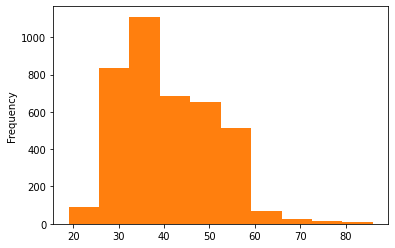

In [52]:
generated_df_class_false.age.plot(kind='hist')
real_df_class_false.age.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

<AxesSubplot:ylabel='Frequency'>

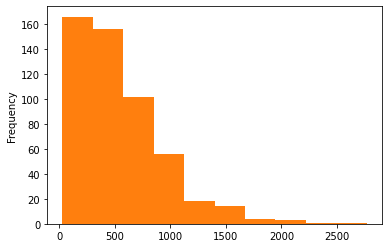

In [45]:
generated_df_class_true.duration.plot(kind='hist')
real_df_class_true.duration.plot(kind='hist')

In [93]:
# cat_cols = df.select_dtypes(include=['category']).columns
# numeric_cols = df.select_dtypes(exclude=['category']).columns
#
# print('categorical columns are:', cat_cols)
# print('numeric columns are:', numeric_cols)

In [85]:
# num_classes = df[label_col].nunique()
#
# df[label_col] = df[label_col].astype('category')
#
# # There's only 1 class, so essentially rename the 'Class' to 'Class_1',
# # which tells weather a sample data is of class 1 or not.
# df = pd.get_dummies(df, columns=[label_col], prefix='class', drop_first=True)
#
# train_sample = df.copy().reset_index(drop=True)
# print(f"df columns: {train_sample.columns}")
#
# # 'Class_1' label
# label_cols = [ i for i in train_sample.columns if 'class_' in i ]
#
# # All columns except 'Class_1'
# data_cols = [ i for i in train_sample.columns if i not in label_cols ]
#
# # Scale down the data, and rename it to 'train_no_label'
# train_sample[data_cols] = train_sample[data_cols].astype(int) / 10 # scale to random noise size, one less thing to learn
#
# # TODO To remove:
# train_no_label = train_sample[data_cols]

In [86]:
models = {'GAN': ['GAN', False, synthesizer.generator]}


In [ ]:
# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=train_sample, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols+label_cols)
labels = fraud_w_classes['Class']

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']
class_labels = ['Class 1','Class 2']

col1, col2 = 'V17', 'V10'

base_dir = 'cache/'

# Actual fraud data visualization
model_steps = [ 0, 100, 200]
rows = len(model_steps)
columns = 1 + len(models)

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

# Go through each of the 3 model_step values -> 0, 100, 200
for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)

    # Plot 'Class 1' and 'Class 2' samples taken from the original data, in a random shuffled fashion
    for group, color, marker, label in zip(real_samples.groupby('Class_1'), colors, markers, class_labels ):
        plt.scatter( group[1][[col1]], group[1][[col2]], 
                         label=label, marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Fraud Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')

    # Go through all the GAN models listed in 'model_names' and defined in 'models'
    for i, model_name in enumerate( model_names[:] ):

        [model_name, with_class, generator_model] = models[model_name]

        generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

        ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

        if with_class:
            g_z = generator_model.predict([z, labels])
            gen_samples = pd.DataFrame(g_z, columns=data_cols+label_cols)
            for group, color, marker, label in zip( gen_samples.groupby('Class_1'), colors, markers, class_labels ):
                plt.scatter( group[1][[col1]], group[1][[col2]], 
                                 label=label, marker=marker, edgecolors=color, facecolors='none' )
        else:
            g_z = generator_model.predict(z)
            gen_samples = pd.DataFrame(g_z, columns=data_cols+['label'])
            gen_samples.to_csv('../../data/Generated_sample.csv')
            plt.scatter( gen_samples[[col1]], gen_samples[[col2]],
                             label=class_labels[0], marker=markers[0], edgecolors=colors[0], facecolors='none' )
        plt.title(model_name)   
        plt.xlabel(col1)
        ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for training steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

# if not os.path.exists("./img"):
    # os.makedirs("./img")
# plt.savefig('img/Comparison_of_GAN_outputs.png', dpi=100)

ImportError: ignored

ImportError: ignored

<Figure size 1008x648 with 2 Axes>

# Load Trained Model

In [ ]:
gan_generator = GANDataGenerator(dataset=origin_dataset, model_class=CGAN, trained_model_path=)